In [66]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

Preproccesing

In [67]:
def persiapan_dataset(path):
    x_latih=[]
    y_latih=[]
    kode = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            kode = 0
        elif labels == 'ca':
            kode = 1
        elif labels == 'ta':
            kode = 2
        elif labels == 'pa':
            kode = 3
        elif labels == 'ya':
            kode = 4
        elif labels == 'wa':
            kode = 5
        elif labels == 'ga':
            kode = 6
        elif labels == 'ja':
            kode = 7
        elif labels == 'da':
            kode = 8
        elif labels == 'ba':
            kode = 9
        elif labels == 'ra':
            kode = 10
        elif labels == 'sa':
            kode = 11
        elif labels == 'nga':
            kode = 12
        elif labels == 'nya':
            kode = 13
        elif labels == 'na':
            kode = 14
        elif labels == 'ma':
            kode = 15
        elif labels == 'la':
            kode = 16
        elif labels== 'ha':
            kode = 17
            
        semua_images_path = glob.glob(path+labels+'/*.jpg')
        for img_path in semua_images_path :
                img=load_img(img_path, target_size=(64,64))
                img=img_to_array(img)
                img=img/255.0
                x_latih.append(img)
                y_latih.append(kode)
    return np.array(x_latih),np.array(y_latih)

In [68]:
x_latih, y_latih = persiapan_dataset('train-set/')
x_val, y_val = persiapan_dataset('test-set/')

In [69]:
print("Shape x_train :",x_latih.shape)
print("Shape y_train:", y_latih.shape)
print(" bShape x_train :",x_val.shape)
print("Shape y_train:", y_val.shape)

Shape x_train : (575, 64, 64, 3)
Shape y_train: (575,)
 bShape x_train : (144, 64, 64, 3)
Shape y_train: (144,)


In [70]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_latih, augment=True)
data_test = datagen.flow(x_latih, y_latih, batch_size=5)

In [71]:
x_latih, y_latih = persiapan_dataset('train-set/')

Train Augmetasi Data


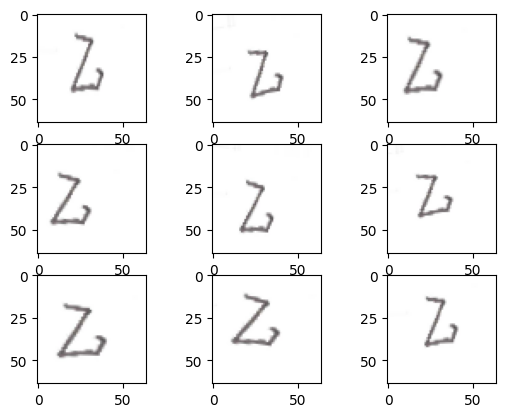

In [85]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_latih[100]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

In [86]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from keras.optimizers import Adam

def modelLeNet():
    model = Sequential()

    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(120, (5, 5), activation='relu'))
    
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(18, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelLeNet().summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 26, 26, 48)        38448     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 13, 13, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 9, 9, 120)         144120    
                                                                 
 flatten_34 (Flatten)        (None, 9720)            

In [87]:
LeNet_Aug = modelLeNet()
LeNet_non_Aug = modelLeNet()

In [89]:
history_nonAug = LeNet_non_Aug.fit(x_latih,y_latih,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
18/18 [==============================] - 5s 282ms/step - loss: 1.4872 - acc: 0.5513 - val_loss: 1.7496 - val_acc: 0.4653
Epoch 2/15
18/18 [==============================] - 5s 251ms/step - loss: 1.3182 - acc: 0.6035 - val_loss: 1.7469 - val_acc: 0.4167
Epoch 3/15
18/18 [==============================] - 5s 254ms/step - loss: 1.2359 - acc: 0.6417 - val_loss: 1.7275 - val_acc: 0.4514
Epoch 4/15
18/18 [==============================] - 4s 250ms/step - loss: 1.1603 - acc: 0.6417 - val_loss: 1.6901 - val_acc: 0.5139
Epoch 5/15
18/18 [==============================] - 5s 256ms/step - loss: 1.0888 - acc: 0.6765 - val_loss: 1.7503 - val_acc: 0.4861
Epoch 6/15
18/18 [==============================] - 5s 251ms/step - loss: 0.9968 - acc: 0.7043 - val_loss: 1.6107 - val_acc: 0.5417
Epoch 7/15
18/18 [==============================] - 4s 244ms/step - loss: 0.8848 - acc: 0.7374 - val_loss: 1.6134 - val_acc: 0.5139
Epoch 8/15
18/18 [==============================] - 4s 245ms/step - loss: 0.

In [91]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_val,y_val),
          steps_per_epoch=len(x_latih)/5, epochs=15)

Epoch 1/15
115/115 [==============================] - 9s 81ms/step - loss: 2.8923 - acc: 0.0504 - val_loss: 2.8889 - val_acc: 0.0694
Epoch 2/15
115/115 [==============================] - 8s 68ms/step - loss: 2.8913 - acc: 0.0574 - val_loss: 2.8849 - val_acc: 0.0417
Epoch 3/15
115/115 [==============================] - 8s 68ms/step - loss: 2.8881 - acc: 0.0574 - val_loss: 2.8635 - val_acc: 0.1528
Epoch 4/15
115/115 [==============================] - 8s 67ms/step - loss: 2.8553 - acc: 0.1130 - val_loss: 2.7112 - val_acc: 0.1181
Epoch 5/15
115/115 [==============================] - 8s 68ms/step - loss: 2.7313 - acc: 0.1339 - val_loss: 2.3615 - val_acc: 0.2708
Epoch 6/15
115/115 [==============================] - 8s 69ms/step - loss: 2.5139 - acc: 0.2087 - val_loss: 2.0655 - val_acc: 0.3472
Epoch 7/15
115/115 [==============================] - 9s 75ms/step - loss: 2.3158 - acc: 0.2643 - val_loss: 2.0110 - val_acc: 0.4306
Epoch 8/15
115/115 [==============================] - 8s 72ms/step - 

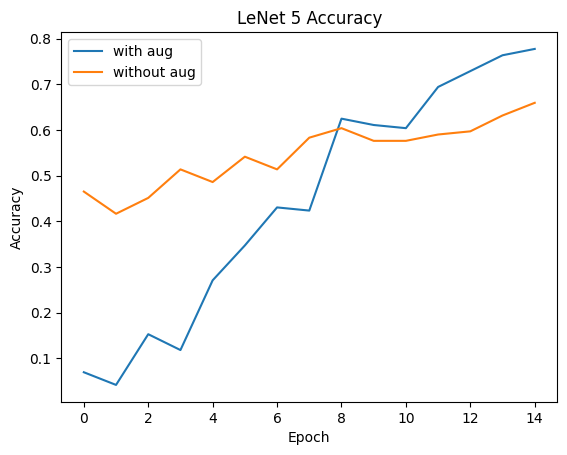

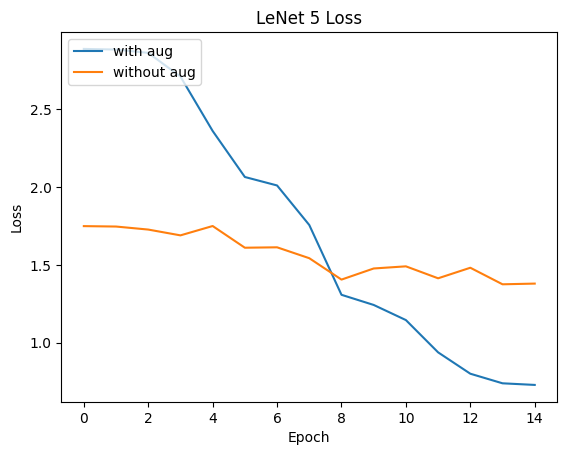

In [92]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_nonAug.history['val_acc'])
plt.title('LeNet 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_nonAug.history['val_loss'])
plt.title('LeNet 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

In [93]:
def prediksi_dataset(path):
    x_predik=[]
    y_predik=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_predik.append(img)
                y_predik.append(label)
    return np.array(x_predik),np.array(y_predik)

def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

In [94]:
x_predik, y_predik = prediksi_dataset('prediksi/')
print("Shape x_prediksi :",x_predik.shape)
print("Shape y_prediksi:", y_predik.shape)

Shape x_prediksi : (0,)
Shape y_prediksi: (0,)


In [95]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(64,64))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [96]:
pred_img = pred_dataset('prediksi/')
pred_img.shape

(36, 64, 64, 3)

1/1 [==============================] - 0s 35ms/step


C:\Users\kiran\AppData\Local\Temp\ipykernel_30204\1010702959.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


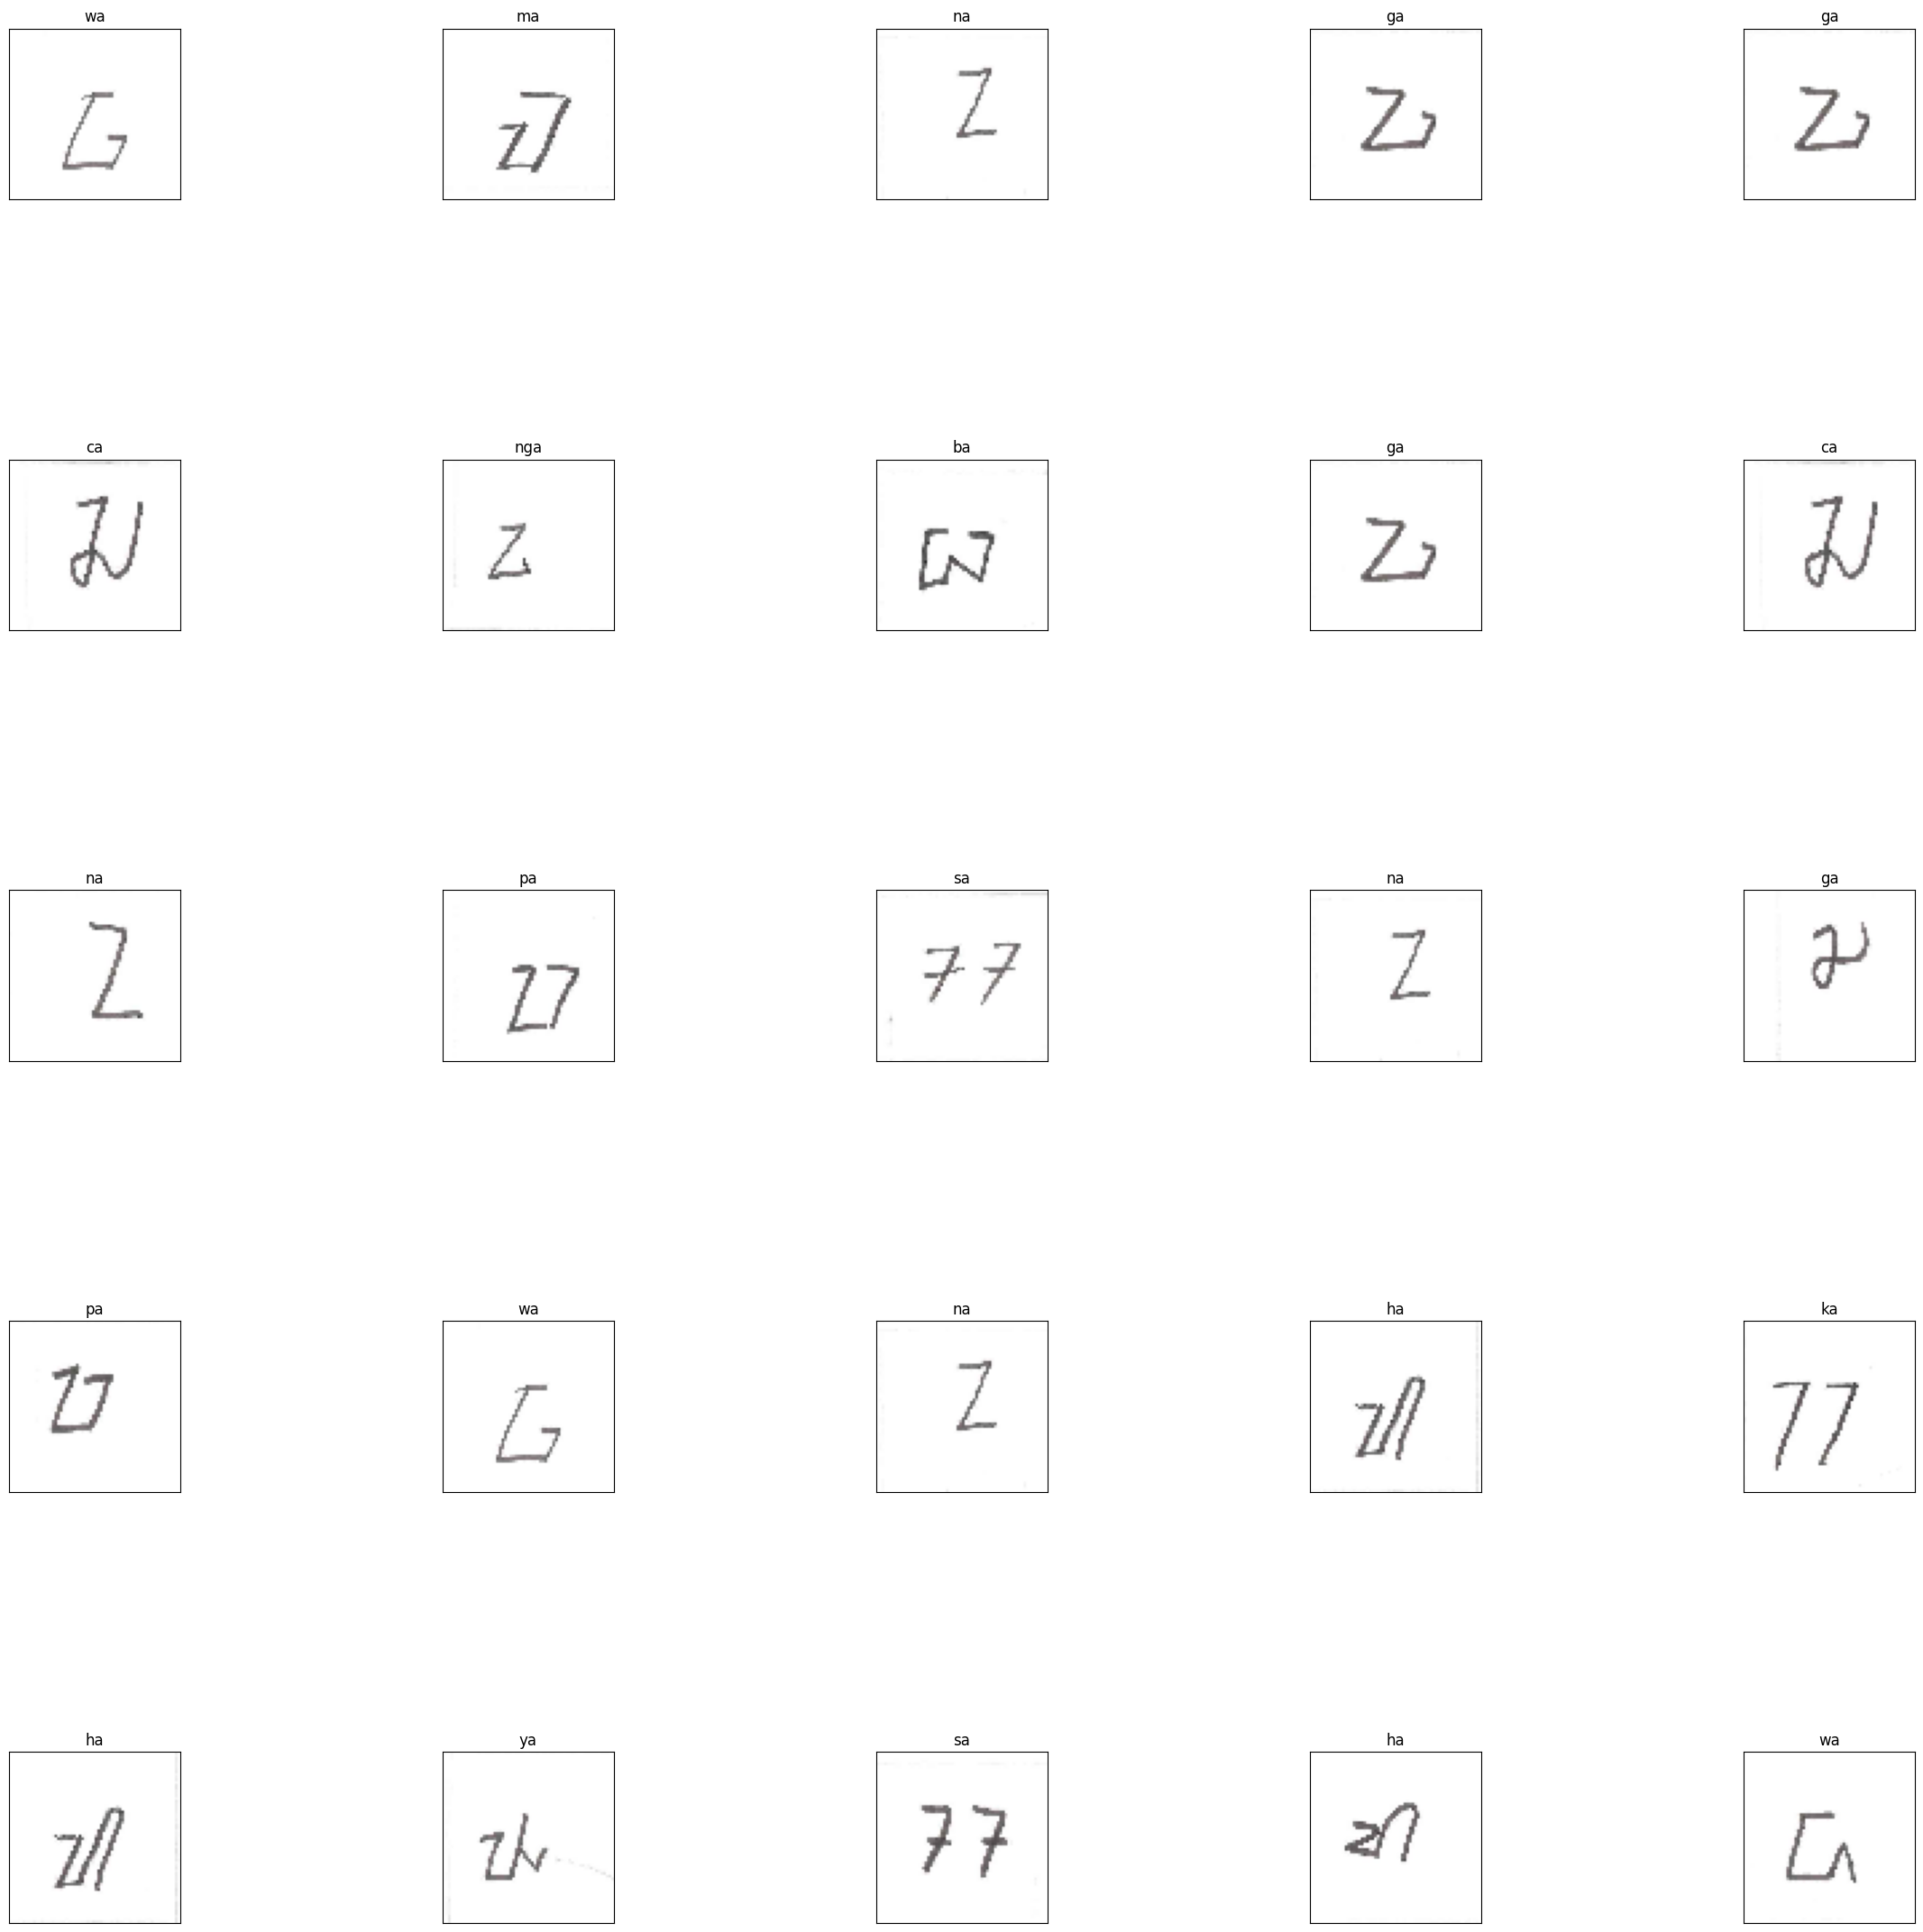

In [97]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(LeNet_Aug.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 52ms/step


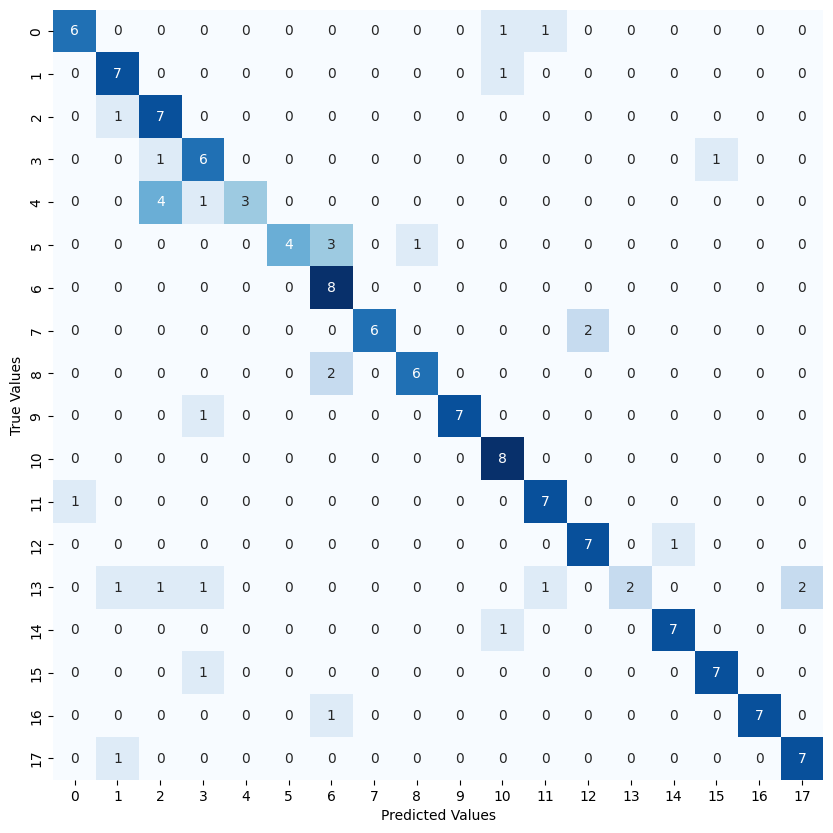

In [102]:
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = LeNet_Aug.predict(x_val)

Y_pred = np.argmax(y_pred, 1) 

mat = confusion_matrix(y_val, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

Menyimpan weight untuk inmplementasi pada aplikasi Web

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(LeNet_Aug, 'models')